# Simple linear regression analysis

In [1]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the students study hours datasets.
studyHour = pd.read_csv(r"C:\Users\excel\PycharmProjects\marks_prediction\student_info.csv")
studyHour.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
# summary statistics
studyHour.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# Mean study hours is 7 hours and the Mean marks is 78%

In [4]:
mean_hour = studyHour['study_hours'].mean()
mean_marks = studyHour['student_marks'].mean()
print(f'The students are studying on average {round(mean_hour)} hours everyday, and average {round(mean_marks)}% of marks are obtained.' )

The students are studying on average 7 hours everyday, and average 78% of marks are obtained.


# Checking for missing value in dataset

In [14]:
print(f'There are \n{studyHour.isnull().sum()} missing observation')

There are 
study_hours      0
student_marks    0
dtype: int64 missing observation


In [12]:
#fill na values in study hours column
studyHour['study_hours'] = studyHour['study_hours'].fillna(mean_hour)

In [13]:
studyHour.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# choosing the features for target and response variables
target variable (y): marks
response variable (x): hours

In [15]:
#choose X and Y inputs
X = pd.DataFrame(studyHour['study_hours'])
y = studyHour['student_marks']

In [17]:
X.shape, y.shape

((200, 1), (200,))

In [ ]:
# scatter plot for linear relation between study_hours vs student_marks

Text(0, 0.5, 'students study marks')

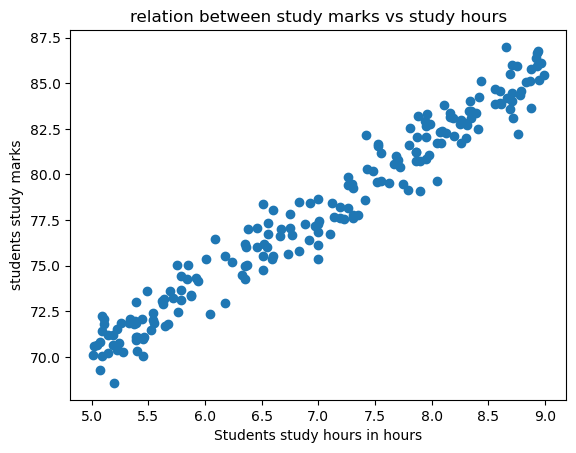

In [19]:
plt.scatter(X,y)
plt.title("relation between study marks vs study hours")
plt.xlabel('Students study hours in hours')
plt.ylabel("students study marks")


In [23]:
# Checking the linear relation berween study hours and marks
relation = studyHour['student_marks'].corr(studyHour['study_hours'])
if relation > 0.5:
    print(f'r = {round(relation,2)}, There is a strong relation between study hours and marks obtained')
else:
    print(f'{relation} There lower relation')

r = 0.98, There is a strong relation between study hours and marks obtained


# Loading and Fitting the linear equation model from scikit library

In [21]:
Linear_model = LinearRegression()
Linear_model.fit(X,y)

LinearRegression()

In [37]:
# slop and intercept value
Linear_model.coef_, Linear_model.intercept_

(array([3.89645241]), 50.67436878323756)

In [24]:
# Calculate the R2 value on fitted equation
R2 = Linear_model.score(X,y)
print(f'R2 score is {round(R2,2)}')

R2 score is 0.96


### R2 score is higher we can go for prediction

# Prediction on user data

In [35]:
studying_hour =np.array(int(input('Enter: How much hours for daily you study? ')),ndmin = 2)

if studying_hour <= 0 or studying_hour > 10 :
    print('Give the hours between 1  to 10')
else:
    scoring_marks = Linear_model.predict(studying_hour)
    print(f'If you study of {studying_hour[0,0]} hours, you will score {round(scoring_marks[0],2)}%')

Enter: How much hours for daily you study? 5
If you study of 5 hours, you will score 70.16%


# Loading and Fitting the linear equation model from statsmodels library

In [39]:
# # Fit the regression model OLS- ordinary leas square method
import statsmodels.api as sm
X = sm.add_constant(X)
mlr_model = sm.OLS(y, X).fit()
mlr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.958    
Dependent Variable: student_marks    AIC:                575.0788 
Date:               2024-07-10 11:29 BIC:                581.6754 
No. Observations:   200              Log-Likelihood:     -285.54  
Df Model:           1                F-statistic:        4499.    
Df Residuals:       198              Prob (F-statistic): 4.19e-138
R-squared:          0.958            Scale:              1.0280   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         50.6744    0.4127  122.7931  0.0000  49.8606  51.4882
study_hours    3.8965    0.0581   67.0743  0.0000   3.7819   4.0110
------------------------------------------------------------------
Omnibus:              0.157         Durbin-Watson:           1.905
Prob(Omnibus):        0.924         Jarque-Bera (JB):        0.230
Skew:                 -0.065        Prob(JB):                0.891
Kurtosis:             2.896         Condition No.:           42   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [40]:
# R2 score 
R2_scor = mlr_model.rsquared
print(round(R2_scor,2))

0.96


In [43]:
# predict marks for 8 hoours studing
studying_hour =np.array(int(input('Enter: How much hours for daily you study? ')))
if studying_hour <= 0 or studying_hour > 10 :
    print('Give the hours between 1  to 10')
else:
    predict = mlr_model.predict([[1,studying_hour]])
    print(f'If you study of {studying_hour} hours, you will score {round(predict[0],2)}%')

Enter: How much hours for daily you study? 6
If you study of 6 hours, you will score 74.05%
